#Creating Seperate files

1. Created seperate files for data loader, model, train, test
2. included Resnet18 model in model file
3. Computed mean and standard deviation for CIFAR10 data
4. used mean and std to normalize CIFAR10 data
5. tried to used weights for different classes


##Achieved : 86.55% using Resnet18 model

Remarks:
##Could acheive desired percent > 85% using normalization of data,
but Model is overfitting, we can improve more by using regularizations and different image augamentation techniques

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [2]:
import sys
import os
sys.path.append('/content/gdrive/')
py_file_location = "/content/drive/My Drive/S8_CIFAR_Resnet/"
sys.path.append(os.path.abspath(py_file_location))

In [3]:
%cd '/content/drive/My Drive/S8_CIFAR_Resnet'
!pwd
!ls

/content/drive/My Drive/S8_CIFAR_Resnet
/content/drive/My Drive/S8_CIFAR_Resnet
data	     s8_cifar_dataloader.py  s8_test_file.py
__pycache__  s8_cifar_modelfile.py   s8_train_file.py


In [4]:
# Import your module or file
from s8_cifar_modelfile import Net, ResNet18
from s8_cifar_dataloader import CIFAR10Check_Mean_STD, CIFAR10DataLoader, CIFAR10DataLoaderWithRotate, CIFAR10DataLoaderWithRotateCrop, CIFAR10DataLoaderWithRotateNormalization
from s8_train_file import train
from s8_test_file import test

In [5]:
%matplotlib inline

In [6]:
import torch
import torchvision
import torchvision.transforms as transforms

In [7]:
SEED = 1
# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

CUDA Available? True


##------------------------Call to Data Loader-------------------------

In [8]:
input_batch_size=128

traindataMean, traindataStd = CIFAR10Check_Mean_STD(input_batch_size)
traindataMean = tuple (traindataMean)
traindataStd = tuple (traindataStd)

trainset, trainloader, testset, testloader, classes = CIFAR10DataLoaderWithRotateNormalization(input_batch_size, traindataMean, traindataStd)
#trainset, trainloader, testset, testloader, classes = CIFAR10DataLoaderWithRotateNormalizationwithConstantValues(input_batch_size)
print(traindataMean, traindataStd)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
(tensor(0.4914), tensor(0.4822), tensor(0.4465)) (tensor(0.2023), tensor(0.1994), tensor(0.2010))


##------------------ Visualize Input Image ---------------------------- 
Let us show some of the training images, for fun.



/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")


(128, 3, 32, 32)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


 bird plane   dog truck


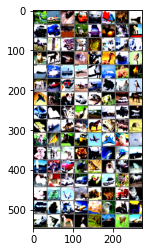

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() 
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels =  dataiter.next()
print(images.numpy().shape)  

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

##  ------------------------------Getting Resnet18 network from model file----------------------- 

1. Get the model
2. print summary
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

Copy the neural network from the Neural Networks section before and modify it to
take 3-channel images (instead of 1-channel images as it was defined).



In [10]:
# load to device and print model summary
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
# call now Resnet18 model
model = ResNet18().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

##------------------------------Calling training and testing  -------------------------

In [11]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, ReduceLROnPlateau
import torch.nn as nn
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss()
model =  ResNet18().to(device)
# without weight reached 80%
# with weight = 0 reached 79%
#with weight = 0.5 reached  Test accuracy = 10%
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.7 )

scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

EPOCHS = 15
for epoch in range(EPOCHS):
    #print("EPOCH:", epoch)
    print('Epoch-{0} lr: {1}'.format(epoch, optimizer.param_groups[0]['lr']))
    train(model, device, trainloader, optimizer, epoch,criterion)
    scheduler.step()
    test(model, device, testloader)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch-0 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=1.2761890888214111 Batch_id=390 Accuracy=43.01: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 5665/10000 (56.65%)

Epoch-1 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.6572557687759399 Batch_id=390 Accuracy=64.12: 100%|██████████| 391/391 [00:33<00:00, 11.82it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 6974/10000 (69.74%)

Epoch-2 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.39318346977233887 Batch_id=390 Accuracy=74.04: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 7247/10000 (72.47%)

Epoch-3 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.5464586615562439 Batch_id=390 Accuracy=79.37: 100%|██████████| 391/391 [00:33<00:00, 11.78it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 7751/10000 (77.51%)

Epoch-4 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.41870659589767456 Batch_id=390 Accuracy=82.94: 100%|██████████| 391/391 [00:33<00:00, 11.70it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8093/10000 (80.93%)

Epoch-5 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.4088009297847748 Batch_id=390 Accuracy=85.67: 100%|██████████| 391/391 [00:33<00:00, 11.73it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 7965/10000 (79.65%)

Epoch-6 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.3001520037651062 Batch_id=390 Accuracy=88.19: 100%|██████████| 391/391 [00:32<00:00, 11.85it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 7981/10000 (79.81%)

Epoch-7 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.33152681589126587 Batch_id=390 Accuracy=90.12: 100%|██████████| 391/391 [00:33<00:00, 11.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8089/10000 (80.89%)

Epoch-8 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.2552477717399597 Batch_id=390 Accuracy=91.80: 100%|██████████| 391/391 [00:33<00:00, 11.75it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8328/10000 (83.28%)

Epoch-9 lr: 0.1


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.17727819085121155 Batch_id=390 Accuracy=93.40: 100%|██████████| 391/391 [00:33<00:00, 11.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8203/10000 (82.03%)

Epoch-10 lr: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.0707414448261261 Batch_id=390 Accuracy=97.42: 100%|██████████| 391/391 [00:33<00:00, 11.84it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8610/10000 (86.10%)

Epoch-11 lr: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.10784478485584259 Batch_id=390 Accuracy=98.60: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8649/10000 (86.49%)

Epoch-12 lr: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.027925897389650345 Batch_id=390 Accuracy=98.92: 100%|██████████| 391/391 [00:33<00:00, 11.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8644/10000 (86.44%)

Epoch-13 lr: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.06454550474882126 Batch_id=390 Accuracy=99.15: 100%|██████████| 391/391 [00:33<00:00, 11.76it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set: Accuracy: 8651/10000 (86.51%)

Epoch-14 lr: 0.010000000000000002


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
/usr/local/lib/python3.6/dist-packages/torchvision/transforms/functional_tensor.py:876: UserWarning: Argument fill/fillcolor is not supported for Tensor input. Fill value is zero
  warnings.warn("Argument fill/fillcolor is not supported for Tensor input. Fill value is zero")
Loss=0.04801047593355179 Batch_id=390 Accuracy=99.39: 100%|██████████| 391/391 [00:33<00:00, 11.77it/s]



Test set: Accuracy: 8655/10000 (86.55%)



5. Test the network on the test data
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^




Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


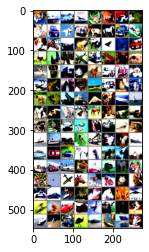

In [12]:
dataiter = iter(testloader)
images, labels = dataiter.next()
images, labels = images.to(device), labels.to(device)

imagesToshow = images.detach().cpu()
# print images
imshow(torchvision.utils.make_grid(imagesToshow))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
def classwiseAccuracy(model,device,testloader, batchSize,numClasses):
  class_correct = list(0. for i in range(numClasses))
  class_total = list(0. for i in range(numClasses))
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          images, labels = images.to(device), labels.to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs, 1)
          c = (predicted == labels).squeeze()
          for i in range(batchSize):
              label = labels[i]
              class_correct[label] += c[i].item()
              class_total[label] += 1
  for i in range(numClasses):
        print('Accuracy of %5s : %2d %%' % (
            classes[i], 100 * class_correct[i] / class_total[i]))


In [14]:
classwiseAccuracy(model, device, testloader,4,10)

Accuracy of plane : 86 %
Accuracy of   car : 96 %
Accuracy of  bird : 78 %
Accuracy of   cat : 76 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 80 %
Accuracy of horse : 88 %
Accuracy of  ship : 93 %
Accuracy of truck : 89 %
